In [3]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import cv2
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [91]:
class BanknoteDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, self.labels.iloc[idx, 0])
        image = io.imread(img_name)
        image = cv2.resize(image, (128,128), interpolation=cv2.INTER_LINEAR) #rezie image to 128*128
        
        #单数label代表的就是one hot encoding部分而不是整个csv文件
        label = self.labels.iloc[idx, 1:]
        label = np.array([label])
        
        sample = {'image': image, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [92]:
csv_file = "one_hot_labels.csv" 
root_dir = "ThaiCurrencies/All"
bd = BanknoteDataset(csv_file, root_dir)

128
128
128


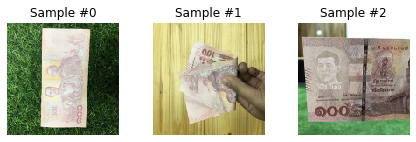

In [93]:
fig = plt.figure()
for i in range(len(bd)):
    if(i<3):
        print(len(bd[0]['image']))
        ax = plt.subplot(1, 3, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{}'.format(i))
        ax.axis('off')
        plt.imshow(bd[i]['image'])